In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [11]:
url = 'https://www.capfriendly.com/browse/active/2023?stats-season=2023'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/active/2023?stats-season=2023&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

df = pd.concat(master)
df
    
    

,PLAYER,TEAM,AGE,POS,HANDED,GP,G,A,P,P/GP,...,TOI,W,L,SO,GAA,Sv%,CLAUSE,EXPIRY,CAP HIT,SALARY
0,1. Connor McDavid,EDM,25,C,Left,82,64,89,153,1.87,...,22:23,-,-,-,-,-,NMC,UFA,"$12,500,000","$12,000,000"
1,2. Artemi Panarin,NYR,30,LW,Right,82,29,63,92,1.12,...,19:36,-,-,-,-,-,NMC,UFA,"$11,642,857","$12,500,000"
2,3. Auston Matthews,TOR,24,C,Left,74,40,45,85,1.15,...,20:16,-,-,-,-,-,NaN,UFA,"$11,640,250","$7,950,000"
3,4. Erik Karlsson,PIT,32,RD,Right,82,25,76,101,1.23,...,25:36,-,-,-,-,-,NMC,UFA,"$11,500,000","$12,000,000"
4,5. Drew Doughty,LAK,32,RD,Right,81,9,43,52,0.64,...,26:13,-,-,-,-,-,NMC,UFA,"$11,000,000","$11,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,1588. Joey Daccord,SEA,25,G,Left,5,-,-,-,-,...,-,2,1,0,3.15,.900,NaN,UFA Group 6,"$750,000","$800,000"
38,1589. Daniel Vladar,CGY,24,G,Left,27,-,-,-,-,...,-,14,6,0,2.91,.892,NaN,RFA,"$750,000","$800,000"
39,1590. Jérémy Groleau,-,22,LD,Left,0,0,0,0,0.00,...,NaN,-,-,-,-,-,NaN,UFA No QO,"$746,667","$750,000"
40,1591. Alexandre Carrier,NSH,25,RD,Right,43,2,7,9,0.21,...,17:53,-,-,-,-,-,NaN,RFA,"$733,333","$750,000"


/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/296590182.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contracts['Total Value'] = contracts['Total Value'].str.replace('$', '').str.replace(',', '').astype(int)
/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/296590182.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contracts['AAV'] = contracts['AAV'].str.replace('$', '').str.replace(',', '').astype(int)/1000000


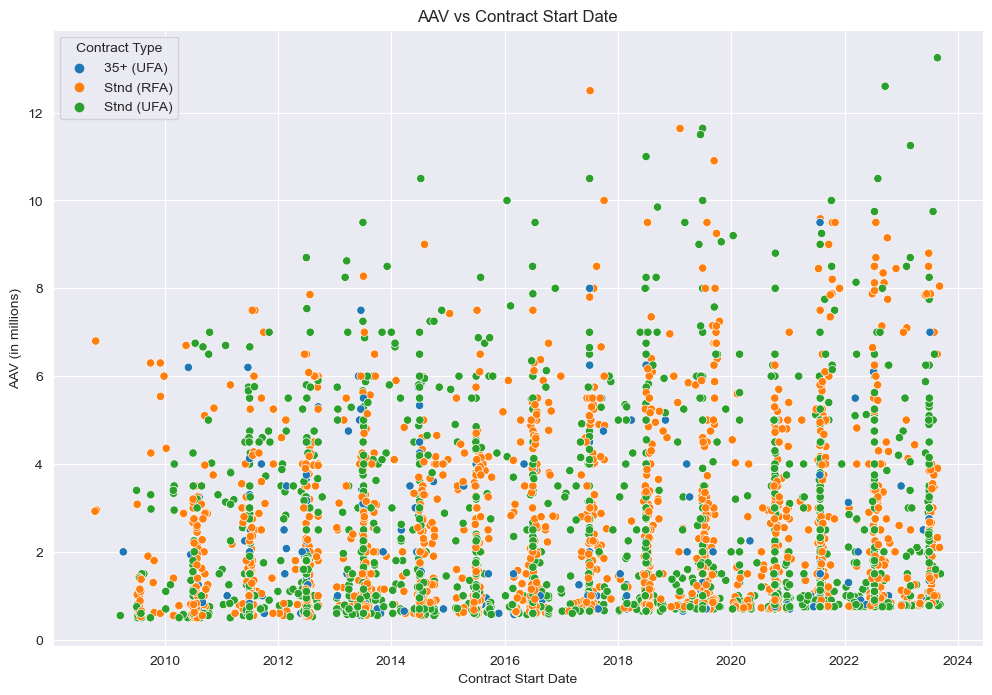

In [76]:
import os, sys
import pandas as pd
import numpy as np


contracts = pd.read_csv('contracts.csv')
contracts = contracts[contracts['Contract Type'].isin(['35+ (UFA)', 'Stnd (RFA)', 'Stnd (UFA)'])]
contracts = contracts[contracts['Way Clause'] == '1-way'].reset_index(drop=True)
contracts['Contract Start Date'] = pd.to_datetime(contracts['Contract Start Date'])
contracts['Total Value'] = contracts['Total Value'].str.replace('$', '').str.replace(',', '').astype(int)
contracts['AAV'] = contracts['AAV'].str.replace('$', '').str.replace(',', '').astype(int)/1000000

# Plot AAV vs Contract Start Date
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))

sns.scatterplot(x='Contract Start Date', y='AAV', data=contracts, hue='Contract Type')
plt.title('AAV vs Contract Start Date')
plt.xlabel('Contract Start Date')
plt.ylabel('AAV (in millions)')
plt.show()


In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.capfriendly.com/ajax/signings/'

teams = ['ducks', 'coyotes', 'bruins', 'sabres', 'flames', 'hurricanes', 'blackhawks', 'avalanche', 'bluejackets', 'stars', 'redwings', 'oilers', 'panthers', 'kings', 'wild', 'canadiens', 'predators', 'devils', 'islanders', 'rangers', 'senators', 'flyers', 'penguins', 'sharks', 'blues', 'lightning', 'mapleleafs', 'canucks', 'goldenknights', 'capitals', 'jets']

def get_team_contracts(team):
    data = []
    columns = ['Name', 'Age', 'Position', 'Team', 'Contract Start Date', 'Contract Type', 'NHL Clause', 'Way Clause', 'Term', 'Total Value', 'AAV']
    for i in range(1,15):
        try:
            r = requests.get(url + team + '?p=' + str(i))
            s = r.json()['data']['html']
            soup = BeautifulSoup(s, 'html.parser')
            table_rows = soup.find_all('tr')
            for row in table_rows:
                row_data = []
                for cell in row.find_all('td'):
                    text = cell.text.strip()
                    row_data.append(text)
                if len(row_data) == len(columns):
                    data.append(row_data)
        except:
            break
    df = pd.DataFrame(data, columns=columns)
    return df

def get_all_contracts():
    df = pd.DataFrame()
    for team in teams:
        df = df.append(get_team_contracts(team))
    return df

df = get_all_contracts()
# df.to_csv('contracts.csv', index=False)
df#.drop_duplicates()#.to_csv('contracts.csv', index=False)

/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/346570676.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(get_team_contracts(team))
/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/346570676.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(get_team_contracts(team))
/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/346570676.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(get_team_contracts(team))
/var/folders/zq/pcg7r_597hq27w9gykf4452c0000gn/T/ipykernel_22503/346570676.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,Name,Age,Position,Team,Contract Start Date,Contract Type,NHL Clause,Way Clause,Term,Total Value,AAV
0,Tristan Luneau,19,RD,ANA,"Sep. 5, 2023",ELC,,2-way,3,"$2,850,000","$896,667"
1,Alex Stalock,35,G,ANA,"Aug. 7, 2023",35+ (UFA),,1-way,1,"$800,000","$800,000"
2,Troy Terry,25,RW,ANA,"Aug. 2, 2023",Stnd (RFA),,1-way,7,"$49,000,000","$7,000,000"
3,Noah Warren,18,RD,ANA,"Jul. 19, 2023",ELC,,2-way,3,"$2,850,000","$896,667"
4,Lukas Dostal,23,G,ANA,"Jul. 16, 2023",Stnd (RFA),,2-way,2,"$1,625,000","$812,500"
...,...,...,...,...,...,...,...,...,...,...,...
248,Blake Wheeler,24,"RW, C",WPG,"Jul. 15, 2011",Stnd (RFA),,1-way,2,"$5,100,000","$2,550,000"
249,Brett Festerling,25,D,WPG,"Jul. 14, 2011",Stnd (RFA),,2-way,1,"$577,500","$577,500"
250,Derek Meech,27,D,WPG,"Jul. 1, 2011",Stnd (RFA),,2-way,1,"$700,000","$700,000"
251,Tanner Glass,27,LW,WPG,"Jul. 1, 2011",Stnd (UFA),,1-way,1,"$750,000","$750,000"


In [66]:
df.to_csv('contracts.csv', index=False)